In [4]:
%load_ext autoreload
%autoreload 2
% pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)

import seaborn as sns

sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:pylab import has clobbered these variables: ['f', 'multivariate_normal']
`%matplotlib` prevents importing * from pylab and numpy


Optimization terminated successfully.
         Current function value: 147.353317
         Iterations: 76
         Function evaluations: 173


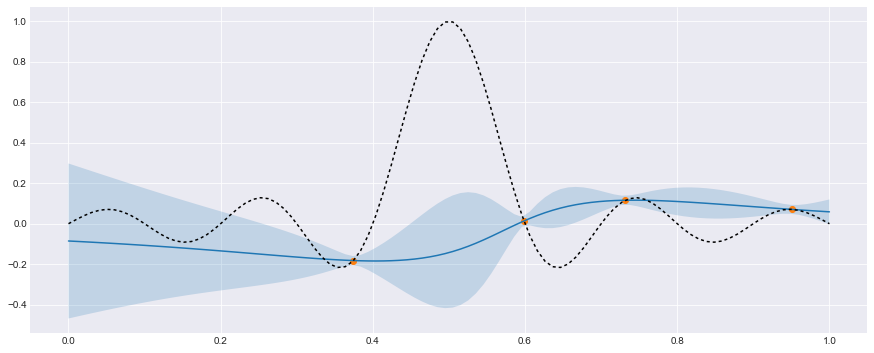

In [5]:
from src.bo import *
from src.dngo import *
from src.acquisition_functions import EI, UCB

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]

rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = TFModel(input_dim=1, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
model.plot_prediction(x,y)

In [30]:
from hpolib.benchmarks.synthetic_functions import Branin

from src.bo import random_hypercube_samples, vectorize

f = Branin()
info = f.get_meta_information()
bounds = np.array(info['bounds'])
f = vectorize(f)

In [10]:
# Random sample
samples = random_hypercube_samples(100, bounds)
values = f(samples)
values[np.argmax(values)]

array([ 202.62384425])

Optimization terminated successfully.
         Current function value: 134.116347
         Iterations: 103
         Function evaluations: 231


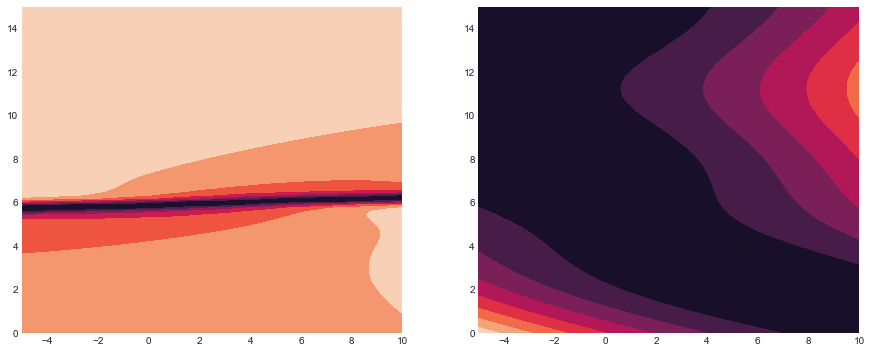

Optimization terminated successfully.
         Current function value: 144.703484
         Iterations: 60
         Function evaluations: 148


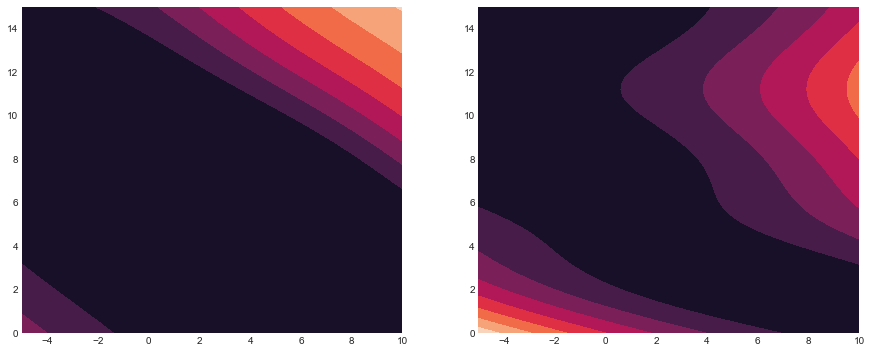

Optimization terminated successfully.
         Current function value: 147.453426
         Iterations: 63
         Function evaluations: 149


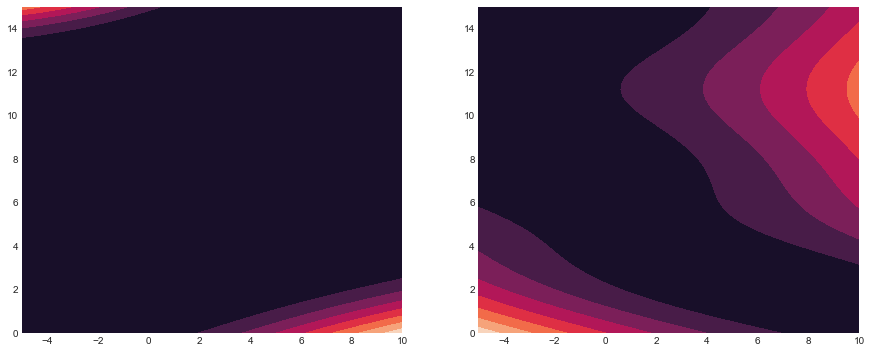

Optimization terminated successfully.
         Current function value: 146.008927
         Iterations: 120
         Function evaluations: 260


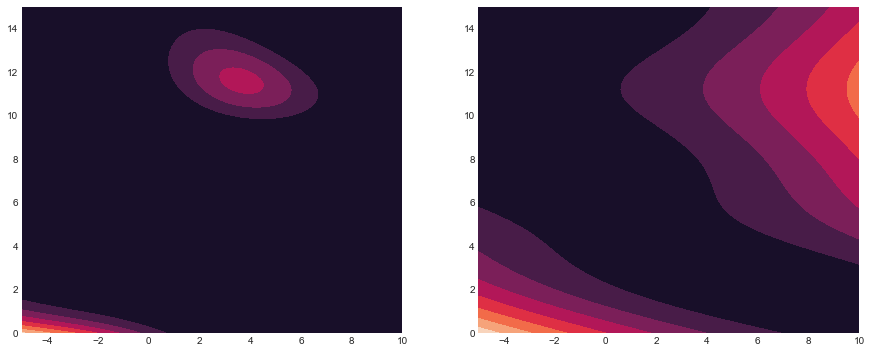

Optimization terminated successfully.
         Current function value: 154.774808
         Iterations: 64
         Function evaluations: 146


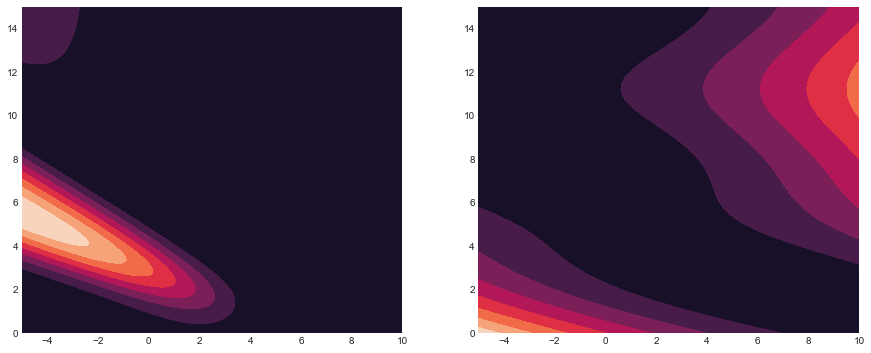

Optimization terminated successfully.
         Current function value: 154.004028
         Iterations: 112
         Function evaluations: 250


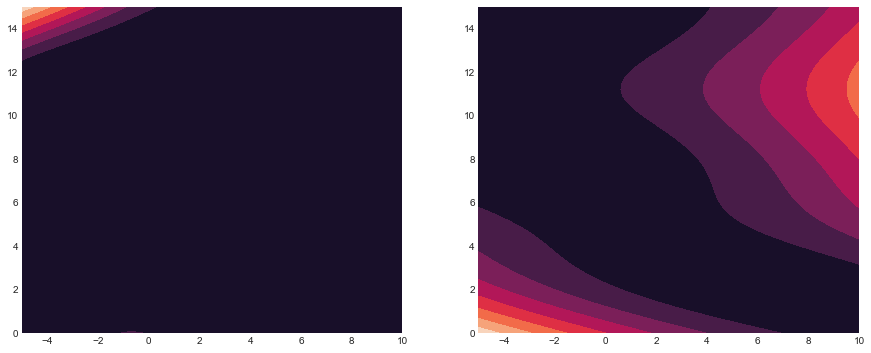

Optimization terminated successfully.
         Current function value: 165.832062
         Iterations: 61
         Function evaluations: 146


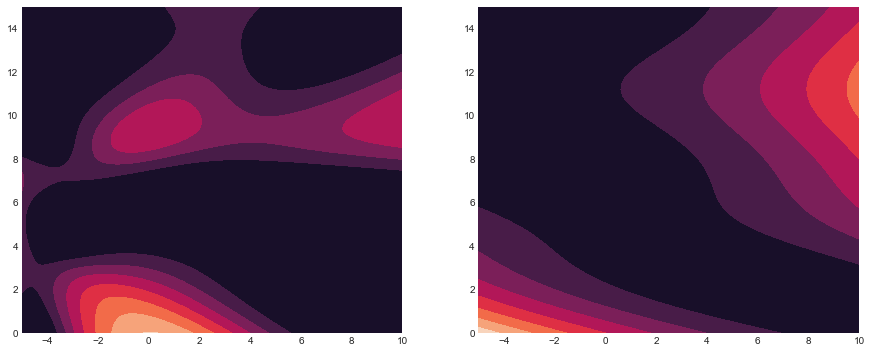

Optimization terminated successfully.
         Current function value: 168.231427
         Iterations: 65
         Function evaluations: 151


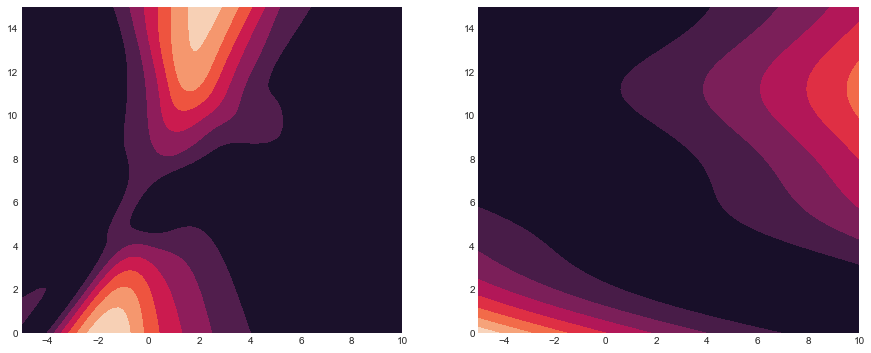

Optimization terminated successfully.
         Current function value: 168.454139
         Iterations: 57
         Function evaluations: 146


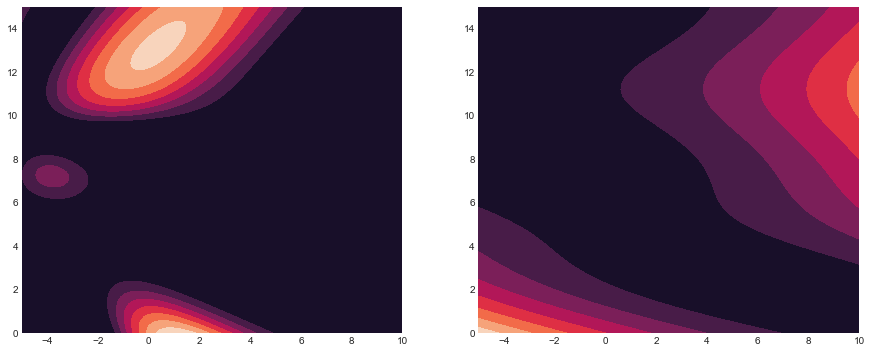

Optimization terminated successfully.
         Current function value: 177.059529
         Iterations: 55
         Function evaluations: 113


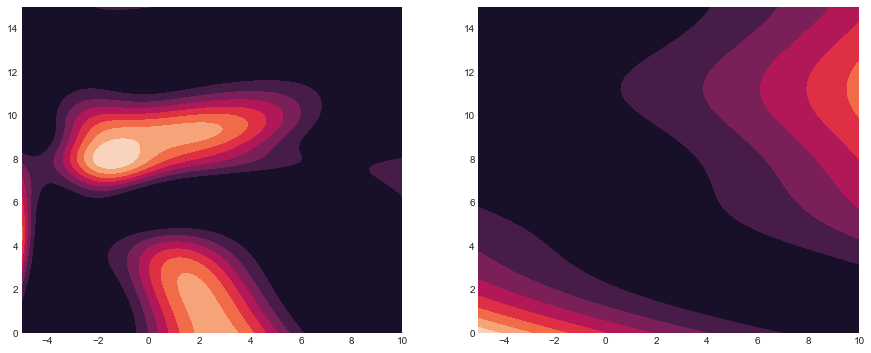

Optimization terminated successfully.
         Current function value: 173.074946
         Iterations: 51
         Function evaluations: 135


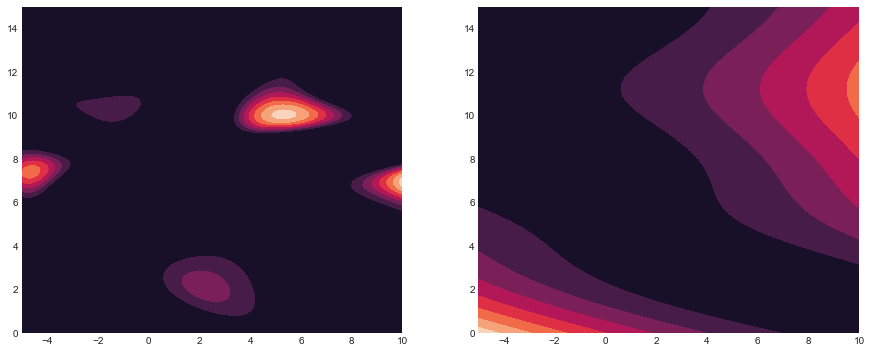

Optimization terminated successfully.
         Current function value: 179.058418
         Iterations: 66
         Function evaluations: 133


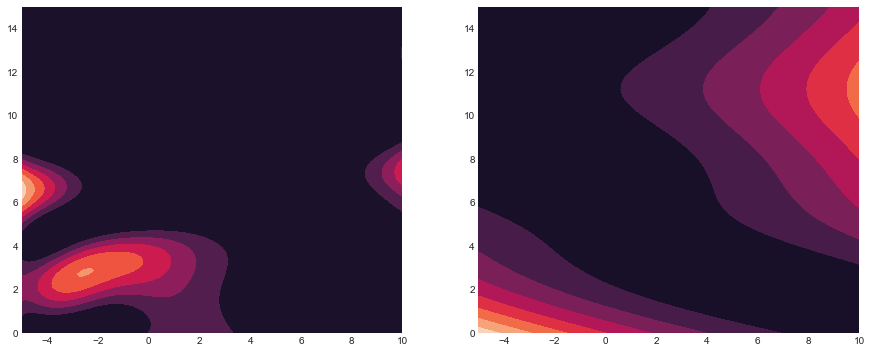

Optimization terminated successfully.
         Current function value: 181.665960
         Iterations: 56
         Function evaluations: 134


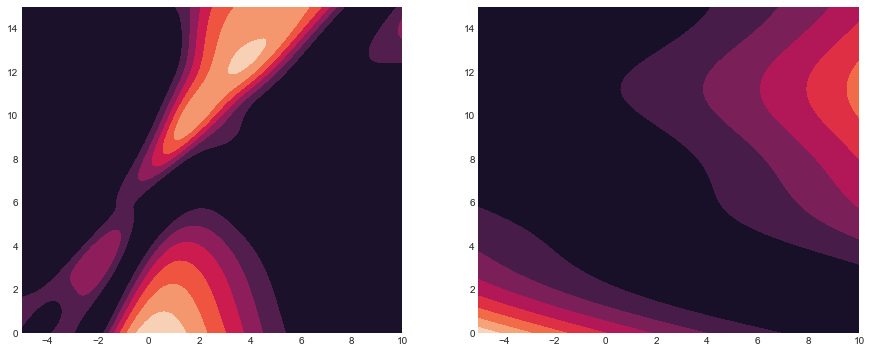

Optimization terminated successfully.
         Current function value: 184.533861
         Iterations: 66
         Function evaluations: 146


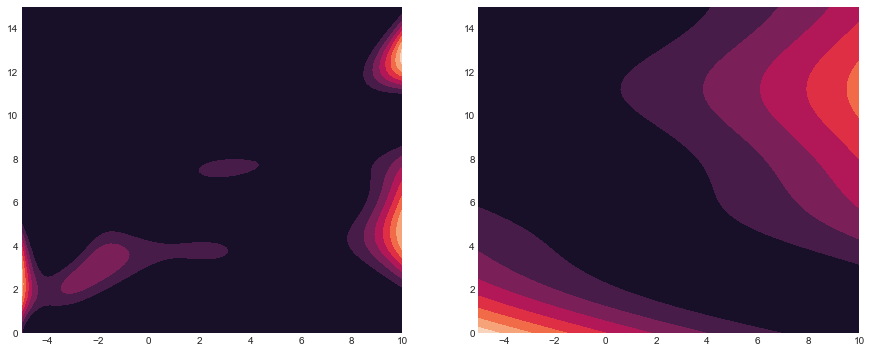

Optimization terminated successfully.
         Current function value: 230.900320
         Iterations: 71
         Function evaluations: 189


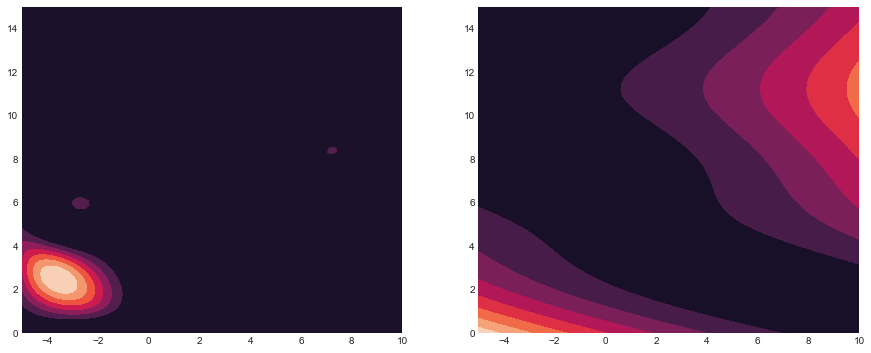

Optimization terminated successfully.
         Current function value: 186.103880
         Iterations: 76
         Function evaluations: 174


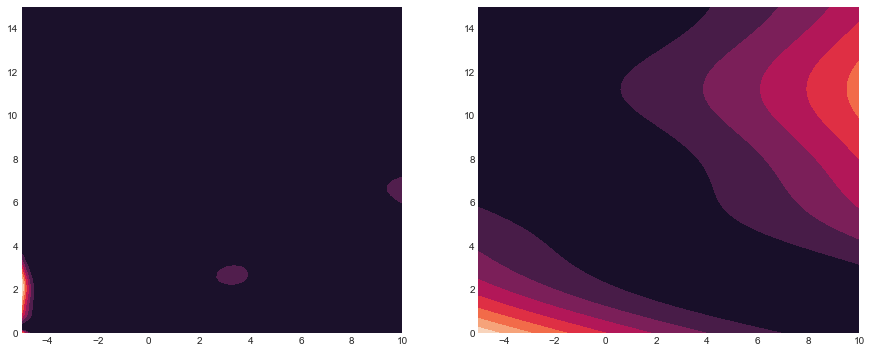

Optimization terminated successfully.
         Current function value: 186.943170
         Iterations: 99
         Function evaluations: 227


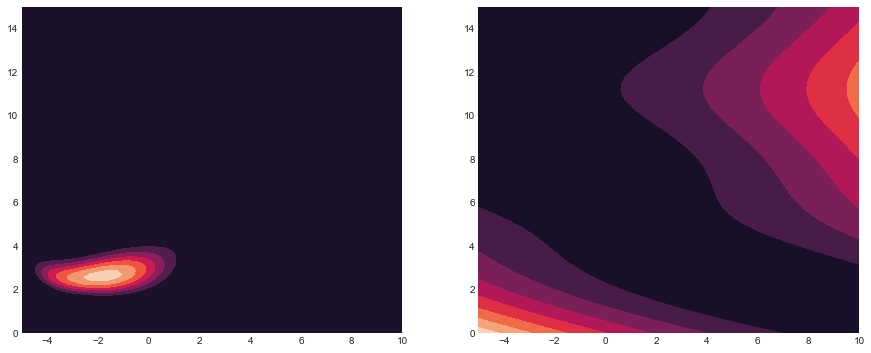

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


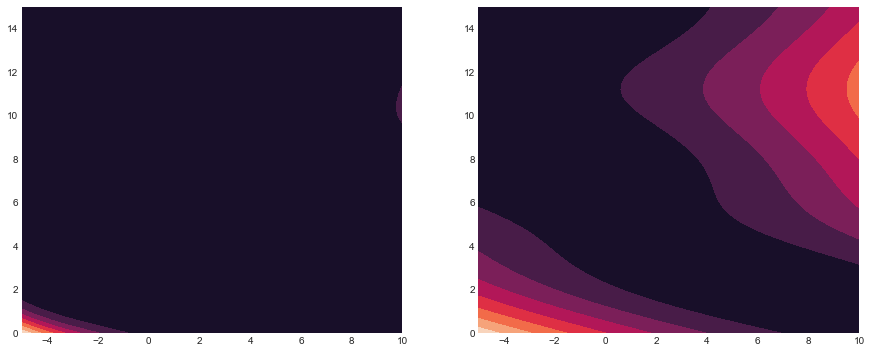

Optimization terminated successfully.
         Current function value: 202.636434
         Iterations: 56
         Function evaluations: 115


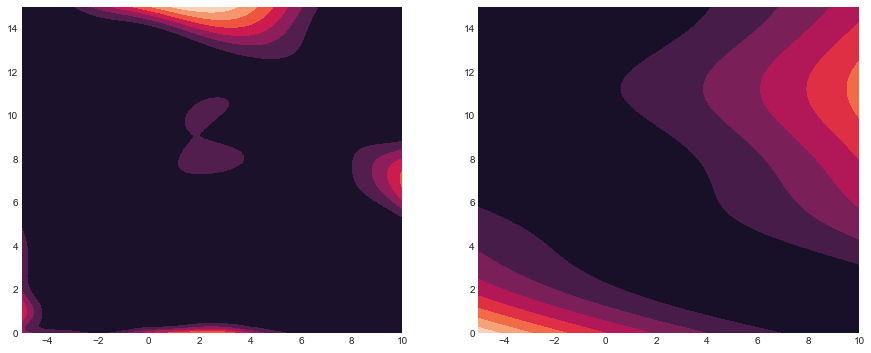

Optimization terminated successfully.
         Current function value: 196.842994
         Iterations: 62
         Function evaluations: 147


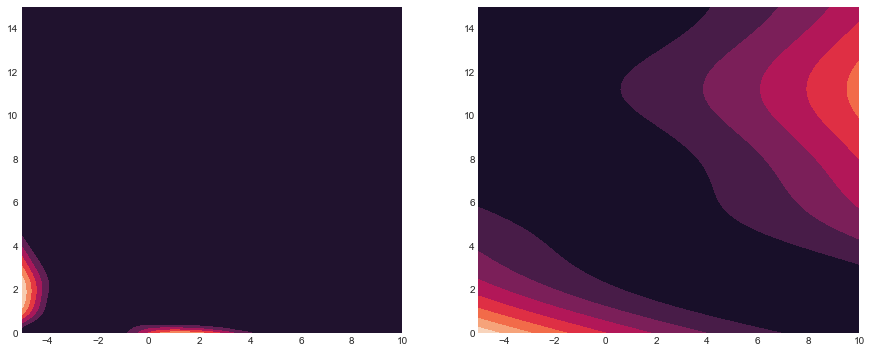

Optimization terminated successfully.
         Current function value: 233.781077
         Iterations: 55
         Function evaluations: 140


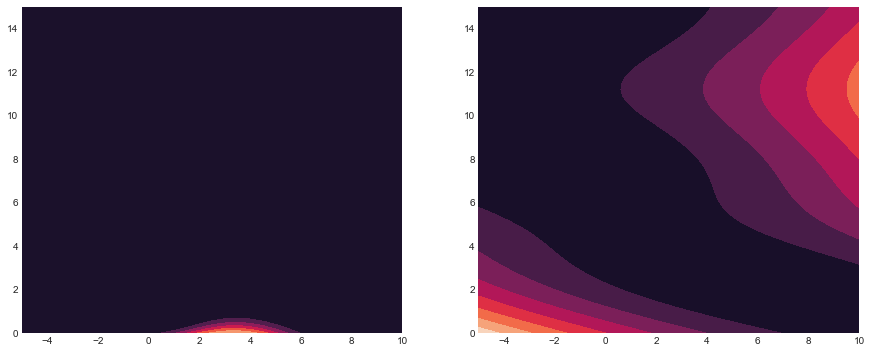

(array([ 3.72220487,  2.97399907]), array([ 3.19962237]))

In [51]:
input_dim = bounds.shape[0]
nn = TFModel(input_dim=input_dim, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
acq = EI(model, par=0.01)
# acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=bounds)
bo.run()
bo.model.get_incumbent()

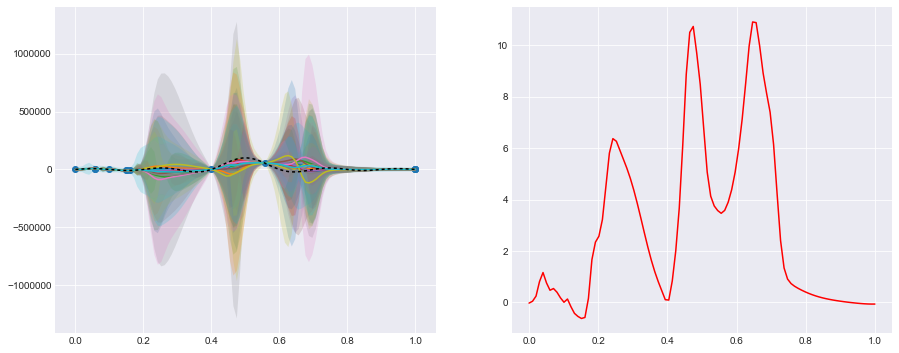

In [15]:
bo.plot_prediction()